In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/glass-quality/Test.csv
/kaggle/input/glass-quality/Sample_Submission.xlsx
/kaggle/input/glass-quality/Train.csv


In [2]:
train = pd.read_csv("/kaggle/input/glass-quality/Train.csv")
test = pd.read_csv("/kaggle/input/glass-quality/Test.csv")

In [3]:
print(train.shape)
print(test.shape)

(1358, 16)
(583, 15)


In [4]:
train.head(3)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1
2,1,0,135,65,950,974,1038442,1036754,300,300.120598,0,0,0,0,0,2


In [5]:
# train.info()

- There is no missing value
- There is no object type column

In [6]:
train.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
count,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1.358000e+03,1.358000e+03,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000,1358.000000
mean,0.406480,0.593520,137.893225,78.977909,567.370398,614.032401,1.660107e+06,1.660139e+06,1903.402798,1903.896240,0.081738,0.106038,0.197349,0.035346,0.027982,1.346834
std,0.491357,0.491357,20.480512,55.324842,522.013094,500.505513,1.778153e+06,1.778177e+06,3839.156721,3839.163241,0.274066,0.308000,0.398145,0.184721,0.164983,0.476138
min,0.000000,0.000000,71.000000,35.000000,0.000000,4.000000,7.527000e+03,7.453000e+03,3.000000,3.445293,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,127.000000,42.000000,53.000000,192.000000,4.662742e+05,4.666918e+05,234.000000,234.335948,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,137.000000,66.000000,407.500000,457.000000,1.216168e+06,1.214700e+06,346.000000,346.044490,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,146.000000,83.000000,1041.750000,1064.000000,2.210012e+06,2.210076e+06,915.250000,915.367817,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,266.000000,305.000000,1692.000000,1717.000000,1.291748e+07,1.291731e+07,37392.000000,37392.672970,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [7]:
test.describe()

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,5.830000e+02,5.830000e+02,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,0.385935,0.614065,136.662093,78.149228,588.096055,635.425386,1.628701e+06,1.628821e+06,2368.331046,2368.838180,0.080617,0.078902,0.210978,0.041166,0.029160
std,0.487233,0.487233,20.112588,54.858769,517.598327,491.010380,1.767507e+06,1.767550e+06,7376.877610,7376.880091,0.272481,0.269818,0.408353,0.198845,0.168398
min,0.000000,0.000000,43.000000,35.000000,1.000000,9.000000,7.438000e+03,7.414000e+03,22.000000,22.200599,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,126.000000,42.000000,60.000000,198.000000,4.947205e+05,4.957495e+05,235.000000,235.420439,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,137.000000,65.000000,484.000000,518.000000,1.168512e+06,1.169583e+06,376.000000,376.661070,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,146.000000,85.000000,1064.500000,1081.500000,2.105844e+06,2.105480e+06,1268.500000,1268.945018,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,232.000000,305.000000,1709.000000,1718.000000,1.298687e+07,1.298686e+07,152727.000000,152727.515949,1.000000,1.000000,1.000000,1.000000,1.000000


## Findings

### 1.Huge diff in this column in Training and Test dataset

- Pixel_area 

Train

**mean** 1903.402798	______ **std Dev**  3839.156721
 
Test

**mean** 2368.331046	______ **std Dev**   7376.877610	

### 2.Pixel_area and log_area have almost same mean and std

We'll see how to use them as we proceed

In [8]:
train.skew()

grade_A_Component_1    0.381221
grade_A_Component_2   -0.381221
max_luminosity         1.266027
thickness              2.216990
xmin                   0.528218
xmax                   0.541422
ymin                   2.788740
ymax                   2.788844
pixel_area             3.295802
log_area               3.295800
x_component_1          3.056777
x_component_2          2.561966
x_component_3          1.522549
x_component_4          5.038291
x_component_5          5.730459
class                  0.644319
dtype: float64

In [9]:
train.kurt()

grade_A_Component_1    -1.857408
grade_A_Component_2    -1.857408
max_luminosity          6.009708
thickness               4.982250
xmin                   -1.127857
xmax                   -1.071308
ymin                   11.217537
ymax                   11.218265
pixel_area             13.680911
log_area               13.680966
x_component_1           7.354714
x_component_2           4.570397
x_component_3           0.318623
x_component_4          23.418860
x_component_5          30.883638
class                  -1.587192
dtype: float64

# Exploring each Column

In [10]:
train.columns

Index(['grade_A_Component_1', 'grade_A_Component_2', 'max_luminosity',
       'thickness', 'xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area',
       'x_component_1', 'x_component_2', 'x_component_3', 'x_component_4',
       'x_component_5', 'class'],
      dtype='object')

## 1. grade_A_Component_1

In [11]:
train['grade_A_Component_1'].value_counts()

0    806
1    552
Name: grade_A_Component_1, dtype: int64

In [12]:
# sns.countplot(data=train,x='grade_A_Component_1')

#### Vs Target column

In [13]:
pd.DataFrame(train.groupby(['grade_A_Component_1','class'])['class'].count())

class
grade_A_Component_1 class       
0                   1        521
                    2        285
1                   1        366
                    2        186

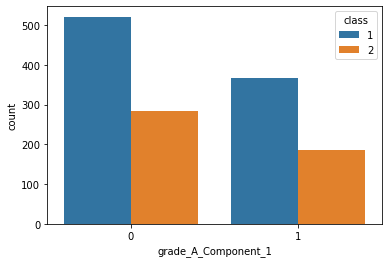

In [14]:
sns.countplot(data=train,x='grade_A_Component_1',hue='class')

"grade_A_Component_1" zero has more tendancy for class 1

# 2. grade_A_Component_2

In [15]:
train['grade_A_Component_2'].value_counts()   

1    806
0    552
Name: grade_A_Component_2, dtype: int64

the count is same as the grade_A_Component_1

In [16]:
pd.DataFrame(train.groupby(['grade_A_Component_2','class'])['class'].count())

class
grade_A_Component_2 class       
0                   1        366
                    2        186
1                   1        521
                    2        285

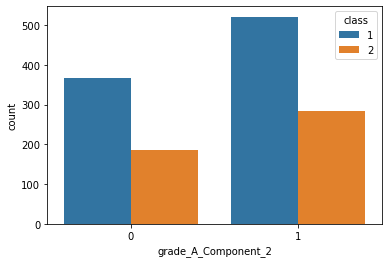

In [17]:
sns.countplot(data=train,x='grade_A_Component_2',hue='class')

"grade_A_Component_2" ONE has more tendancy for class 1

## Conlusion : grade_A_Component_1 and grade_A_Component_2 are just opposite of one another, thus we just need to keep one

#### #2

In [18]:
# train.drop("grade_A_Component_2",axis=1,inplace=True)
# test.drop("grade_A_Component_2",axis=1,inplace=True)

# 3. max_luminosity -- continous

In [19]:
train['max_luminosity'].describe()

count    1358.000000
mean      137.893225
std        20.480512
min        71.000000
25%       127.000000
50%       137.000000
75%       146.000000
max       266.000000
Name: max_luminosity, dtype: float64

In [20]:
len(train['max_luminosity'].unique())

131

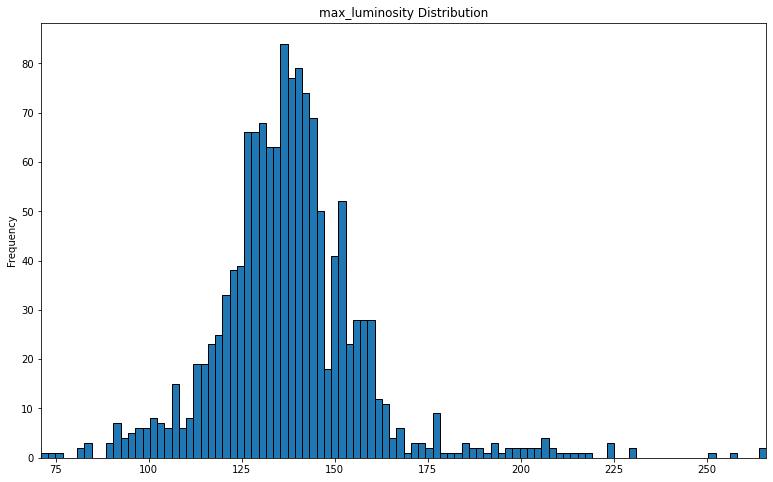

In [21]:
#Check for the distribution of max_luminosity
train['max_luminosity'].plot(kind='hist',figsize=(13,8),bins=100,edgecolor='k',
                              title='max_luminosity Distribution').autoscale(axis='x',tight=True)

# 4. thickness -- continous

In [22]:
train['thickness'].describe()

count    1358.000000
mean       78.977909
std        55.324842
min        35.000000
25%        42.000000
50%        66.000000
75%        83.000000
max       305.000000
Name: thickness, dtype: float64

In [23]:
len(train['thickness'].unique())

143

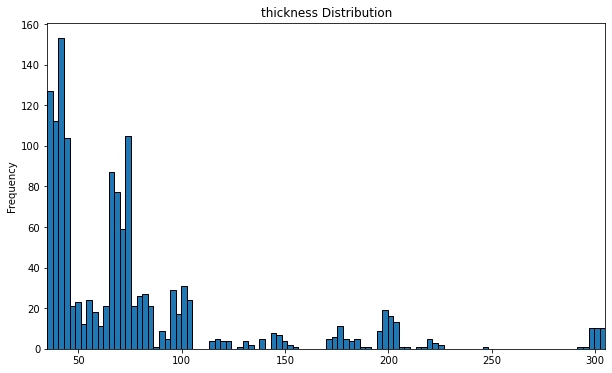

In [24]:
#Check for the distribution of loan amount
train['thickness'].plot(kind='hist',figsize=(10,6),bins=100,edgecolor='k',
                              title='thickness Distribution').autoscale(axis='x',tight=True)

# 5. xmin -- continous

In [25]:
train['xmin'].describe()

count    1358.000000
mean      567.370398
std       522.013094
min         0.000000
25%        53.000000
50%       407.500000
75%      1041.750000
max      1692.000000
Name: xmin, dtype: float64

In [26]:
# train['xmin'].value_counts()

In [27]:
len(train['xmin'].unique())

775

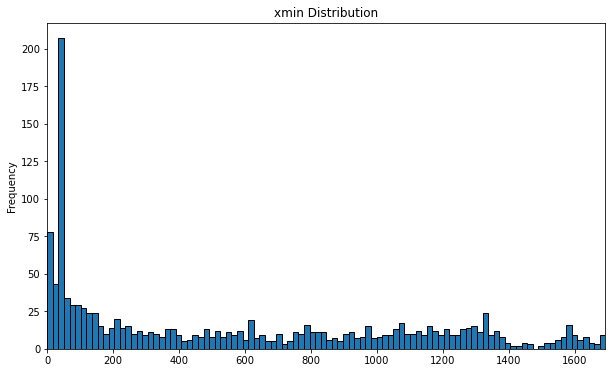

In [28]:
#Check for the distribution of loan amount
train['xmin'].plot(kind='hist',figsize=(10,6),bins=100,edgecolor='k',
                              title='xmin Distribution').autoscale(axis='x',tight=True)

# 6. xmax -- continous

In [29]:
train['xmax'].describe()

count    1358.000000
mean      614.032401
std       500.505513
min         4.000000
25%       192.000000
50%       457.000000
75%      1064.000000
max      1717.000000
Name: xmax, dtype: float64

In [30]:
len(train['xmax'].unique())

811

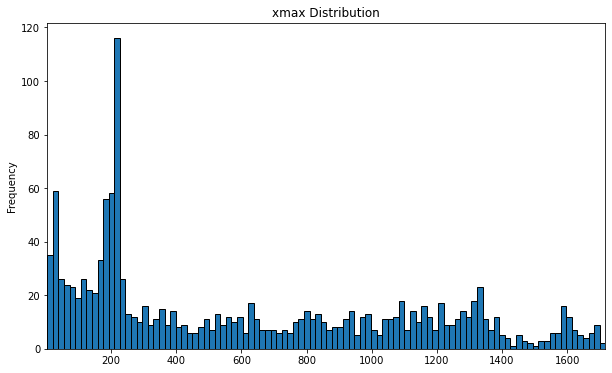

In [31]:
#Check for the distribution of loan amount
train['xmax'].plot(kind='hist',figsize=(10,6),bins=100,edgecolor='k',
                              title='xmax Distribution').autoscale(axis='x',tight=True)

# 7. ymin -- continous

In [32]:
train['ymin'].describe()

count    1.358000e+03
mean     1.660107e+06
std      1.778153e+06
min      7.527000e+03
25%      4.662742e+05
50%      1.216168e+06
75%      2.210012e+06
max      1.291748e+07
Name: ymin, dtype: float64

In [33]:
len(train['ymin'].unique())

1358

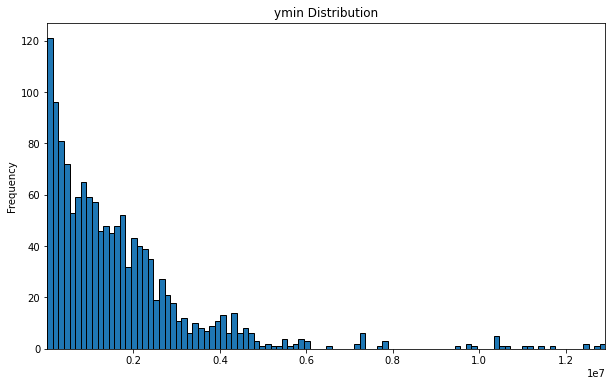

In [34]:
#Check for the distribution of loan amount
train['ymin'].plot(kind='hist',figsize=(10,6),bins=100,edgecolor='k',
                              title='ymin Distribution').autoscale(axis='x',tight=True)

### **All are unique values

# 8. ymax -- continous

In [35]:
train['ymax'].describe()

count    1.358000e+03
mean     1.660139e+06
std      1.778177e+06
min      7.453000e+03
25%      4.666918e+05
50%      1.214700e+06
75%      2.210076e+06
max      1.291731e+07
Name: ymax, dtype: float64

In [36]:
len(train['ymax'].unique())

1358

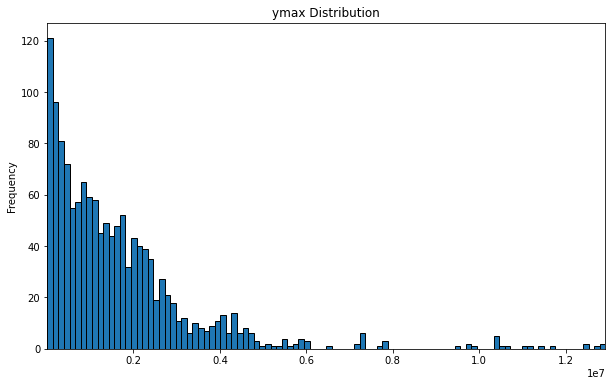

In [37]:
#Check for the distribution of loan amount
train['ymax'].plot(kind='hist',figsize=(10,6),bins=100,edgecolor='k',
                              title='ymax Distribution').autoscale(axis='x',tight=True)

All are unique values

# 9. pixel_area -- continous

In [38]:
train['pixel_area'].describe()

count     1358.000000
mean      1903.402798
std       3839.156721
min          3.000000
25%        234.000000
50%        346.000000
75%        915.250000
max      37392.000000
Name: pixel_area, dtype: float64

In [39]:
train['pixel_area'].head(5)

0     439
1     329
2     300
3    6803
4     251
Name: pixel_area, dtype: int64

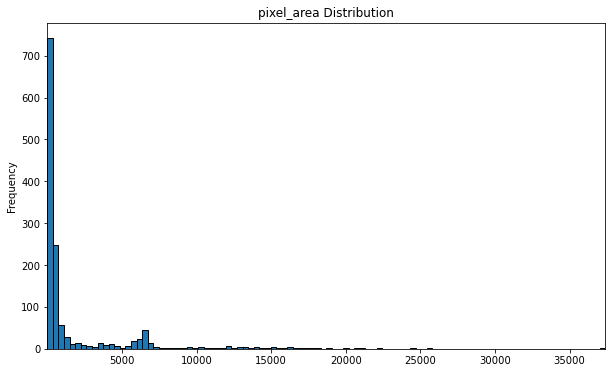

In [40]:
#Check for the distribution of pixel_area 
train['pixel_area'].plot(kind='hist',figsize=(10,6),bins=100,edgecolor='k',
                              title='pixel_area Distribution').autoscale(axis='x',tight=True)

In [41]:
train['pixel_area'].max()

37392

# 10. log_area -- continous

In [42]:
train['log_area'].describe()

count     1358.000000
mean      1903.896240
std       3839.163241
min          3.445293
25%        234.335948
50%        346.044490
75%        915.367817
max      37392.672970
Name: log_area, dtype: float64

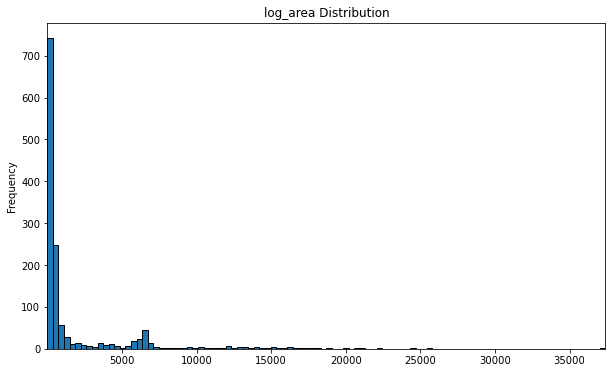

In [43]:
#Check for the distribution of log_area 
train['log_area'].plot(kind='hist',figsize=(10,6),bins=100,edgecolor='k',
                              title='log_area Distribution').autoscale(axis='x',tight=True)

log_area and pixel_area Both are same column take any one.

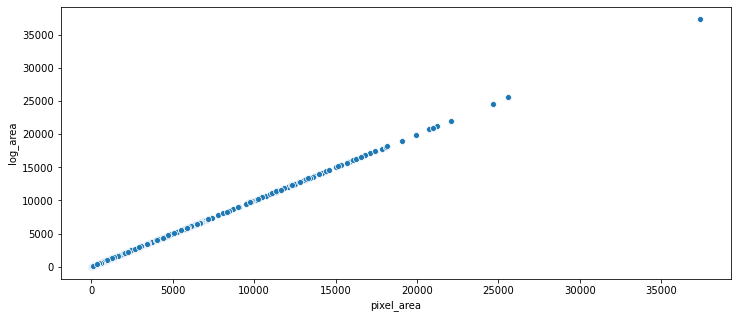

In [44]:
plt.figure(figsize=(12,5))
sns.scatterplot(data=train,x='pixel_area',y='log_area');

# 11. x_component_1

In [45]:
train['x_component_1'].value_counts()

0    1247
1     111
Name: x_component_1, dtype: int64

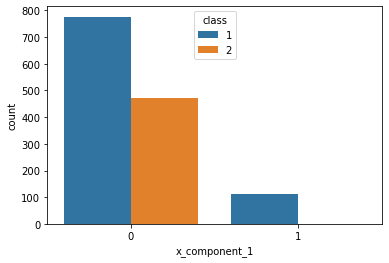

In [46]:
sns.countplot(data=train,x='x_component_1',hue='class')

In [47]:
pd.DataFrame(train.groupby(['x_component_1','class'])['class'].count())

class
x_component_1 class       
0             1        776
              2        471
1             1        111

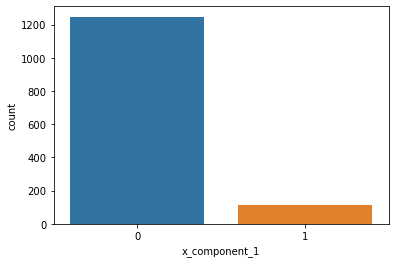

In [48]:
sns.countplot(data=train,x='x_component_1')

### Conclusion
**if "x_component_1"is ONE then only one class is possible i.e 1** 


# 12. x_component_2

In [49]:
train['x_component_2'].value_counts()

0    1214
1     144
Name: x_component_2, dtype: int64

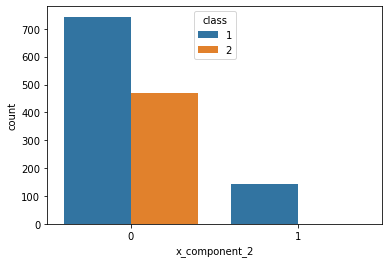

In [50]:
sns.countplot(data=train,x='x_component_2',hue='class')

In [51]:
pd.DataFrame(train.groupby(['x_component_2','class'])['class'].count())

class
x_component_2 class       
0             1        743
              2        471
1             1        144

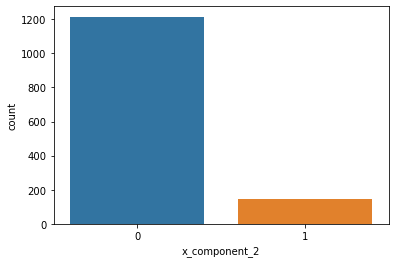

In [52]:
sns.countplot(data=train,x='x_component_2')

## Conlusion
**If x_component_2 is ONE then only one class is possible**

# 13. x_component_3

In [53]:
train['x_component_3'].value_counts()

0    1090
1     268
Name: x_component_3, dtype: int64

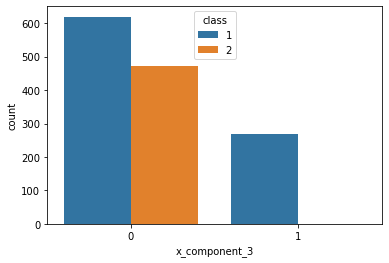

In [54]:
sns.countplot(data=train,x='x_component_3',hue='class')

In [55]:
pd.DataFrame(train.groupby(['x_component_3','class'])['class'].count())

class
x_component_3 class       
0             1        619
              2        471
1             1        268

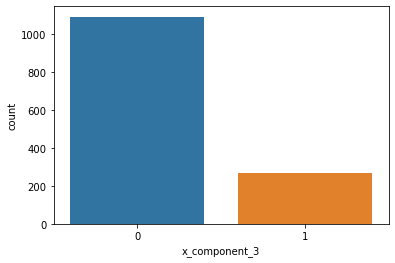

In [56]:
sns.countplot(data=train,x='x_component_3')

## Conlusion
**If x_component_3 is ONE then only one class is possible**

# 14. x_component_4

In [57]:
train['x_component_4'].value_counts()

0    1310
1      48
Name: x_component_4, dtype: int64

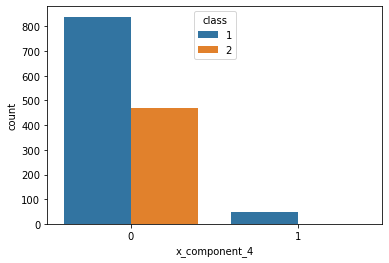

In [58]:
sns.countplot(data=train,x='x_component_4',hue='class')

In [59]:
pd.DataFrame(train.groupby(['x_component_4','class'])['class'].count())

class
x_component_4 class       
0             1        839
              2        471
1             1         48

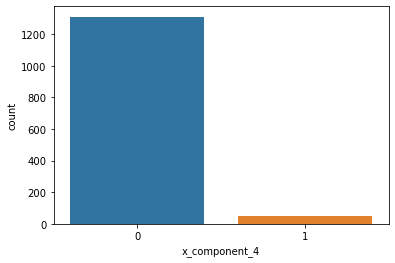

In [60]:
sns.countplot(data=train,x='x_component_4')

## Conlusion
**If x_component_4 is ONE then only one class is possible**

# 15. x_component_5

In [61]:
train['x_component_5'].value_counts()

0    1320
1      38
Name: x_component_5, dtype: int64

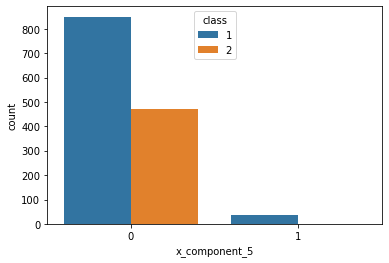

In [62]:
sns.countplot(data=train,x='x_component_5',hue='class')

In [63]:
pd.DataFrame(train.groupby(['x_component_5','class'])['class'].count())

class
x_component_5 class       
0             1        849
              2        471
1             1         38

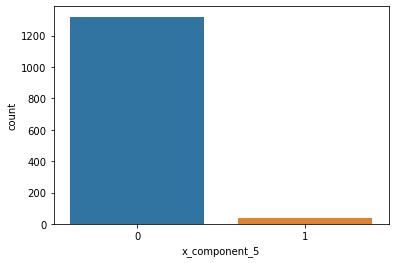

In [64]:
sns.countplot(data=train,x='x_component_5')

## Conlusion
1. **If x_component_5 is ONE then only one class is possible i,e 1**

# 16. class

In [65]:
train['class'].value_counts()

1    887
2    471
Name: class, dtype: int64

In [66]:
print("the ratio of the two classes is {0:0.3f}".format(887/471))

the ratio of the two classes is 1.883


# Checking for duplicate Entries

In [67]:
#check for duplicated data
train.duplicated().sum()

0

## ------------------------------------------------------DONE EXPLORING COLUMNS--------------------------------------------------------

# So let's sum all the findings

1. Huge diff in Pixel_area column in Training and Test dataset

2. grade_A_Component_1 and grade_A_Component_2 are just opposite of one another, thus we just need to keep one

3. ymin all values are unique

4. ymax all values are unique

5. Pixel_area and log_area have almost same
   Thus Keeping only log_area ( since it has decimal precission)

6. if "x_component_1" is ONE then only one class is possible i.e 1

7. if "x_component_2" is ONE then only one class is possible i.e 1

8. if "x_component_3" is ONE then only one class is possible i.e 1

9. if "x_component_4" is ONE then only one class is possible i.e 1

10. if "x_component_5" is ONE then only one class is possible i.e 1

11. The ratio of the two classes is 1.8 in Target Variable

### Dropping ymin and ymax

#### #1 Dont know what to do

In [68]:
# -------------

#### #2 Grade1 = 1 / Grade2

In [69]:
# Already Done by dropping

#### #3 Dropping Ymin

In [70]:
# train.drop("ymin",axis=1,inplace=True)
# test.drop("ymin",axis=1,inplace=True)

#### #4 Dropping Ymax

In [71]:
# train.drop("ymax",axis=1,inplace=True)
# test.drop("ymax",axis=1,inplace=True)

#### #5 Dropping Pixel ARea

In [72]:
# train.drop("pixel_area",axis=1,inplace=True)
# test.drop("pixel_area",axis=1,inplace=True)

#### #6 #7 #8 #9 #10

## Known RECORDS IN training set

In [73]:
one = train[train['x_component_1']==1]
one = np.array(one.index)
# one

two = train[train['x_component_2']==1]
two = np.array(two.index)
# two

three = train[train['x_component_3']==1]
three = np.array(three.index)
# three

four = train[train['x_component_4']==1]
four = np.array(four.index)
# four

five = train[train['x_component_5']==1]
five = np.array(five.index)
# five


known_index_train = []

for i in range(len(one)):
    known_index_train.append(one[i])
    
for i in range(len(two)):
    known_index_train.append(two[i])
    
for i in range(len(three)):
    known_index_train.append(three[i])
    
for i in range(len(four)):
    known_index_train.append(four[i])
    
for i in range(len(five)):
    known_index_train.append(five[i])
    
    
print(len(known_index_train))
known_train_set = set(known_index_train)
print(len(known_train_set))      # f**k almost 609 out of 1358 are supposed to belong class "1"


known_index_train = np.array(known_index_train)
known_index_train.sort()
# known_index_train

609
609


# Known Records in TESTING Dataset
##### i.e If any of the five column has a value == 1 then Target class = "1"

In [74]:
one = test[test['x_component_1']==1]
one = np.array(one.index)
# one

two = test[test['x_component_2']==1]
two = np.array(two.index)
# two

three = test[test['x_component_3']==1]
three = np.array(three.index)
# three

four = test[test['x_component_4']==1]
four = np.array(four.index)
# four

five = test[test['x_component_5']==1]
five = np.array(five.index)
# five

known_index_test = []

for i in range(len(one)):
    known_index_test.append(one[i])
    
for i in range(len(two)):
    known_index_test.append(two[i])
    
for i in range(len(three)):
    known_index_test.append(three[i])
    
for i in range(len(four)):
    known_index_test.append(four[i])
    
for i in range(len(five)):
    known_index_test.append(five[i])
    
    
print(len(known_index_test))
known_set_test = set(known_index_test)
known_index_test = np.array(known_index_test)
known_index_test.sort()
print(len(known_set_test))  

print("Thus out of 583 we know the classes of {0} values i.e {1:0.03f} percentage from the testing dataset".format(257,(257/583)*100))

257
257
Thus out of 583 we know the classes of 257 values i.e 44.082 percentage from the testing dataset


# NEW FEATURE about the x_component

In [75]:
train.head(1)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1


In [76]:
known_train_series = []
for i in range(1358):
    known_train_series.append(3)

    
known_test_series = []
for i in range(583):
    known_test_series.append(3)
    
    
for i in range(1358):
    if i in known_index_train:         # if that element exist in the indexes we know, then
        known_train_series[i] = 1                           #we will assign it as ONE
    else:
        known_train_series[i]= 2                            #and rest as TWO        
        
for i in range(583):
    if i in known_index_test:
        known_test_series[i] = 1
    else:
        known_test_series[i]= 2
        
known_train_series = np.array(known_train_series)
known_test_series = np.array(known_test_series)


train['known'] =known_train_series
test['known'] =known_test_series

print(train['known'].value_counts())                   #i.e we are 100% sure about 609 values


print(test['known'].value_counts()  )                 #i.e we are 100% sure about 257 values

2    749
1    609
Name: known, dtype: int64
2    326
1    257
Name: known, dtype: int64


## #11 Balancing the classes

In [77]:
train['class'].value_counts()

1    887
2    471
Name: class, dtype: int64

In [78]:
X = train.drop(['class'],axis=1)
y = train['class']

from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2,sampling_strategy='all') 
X, y = sm.fit_sample(X, y) 

Using TensorFlow backend.


In [79]:
y.value_counts()

2    887
1    887
Name: class, dtype: int64

# CORELATION

We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

The correlation coefficient gives us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

1. .00 -.19 “very weak”
2. .20 -.39 “weak”
3. .40 -.59 “moderate”
4. .60 -.79 “strong”
5. .80 -1.0 “very strong”

In [80]:
train = pd.merge(X,y,left_index=True,right_index=True)
train.head(2)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,known,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1,1


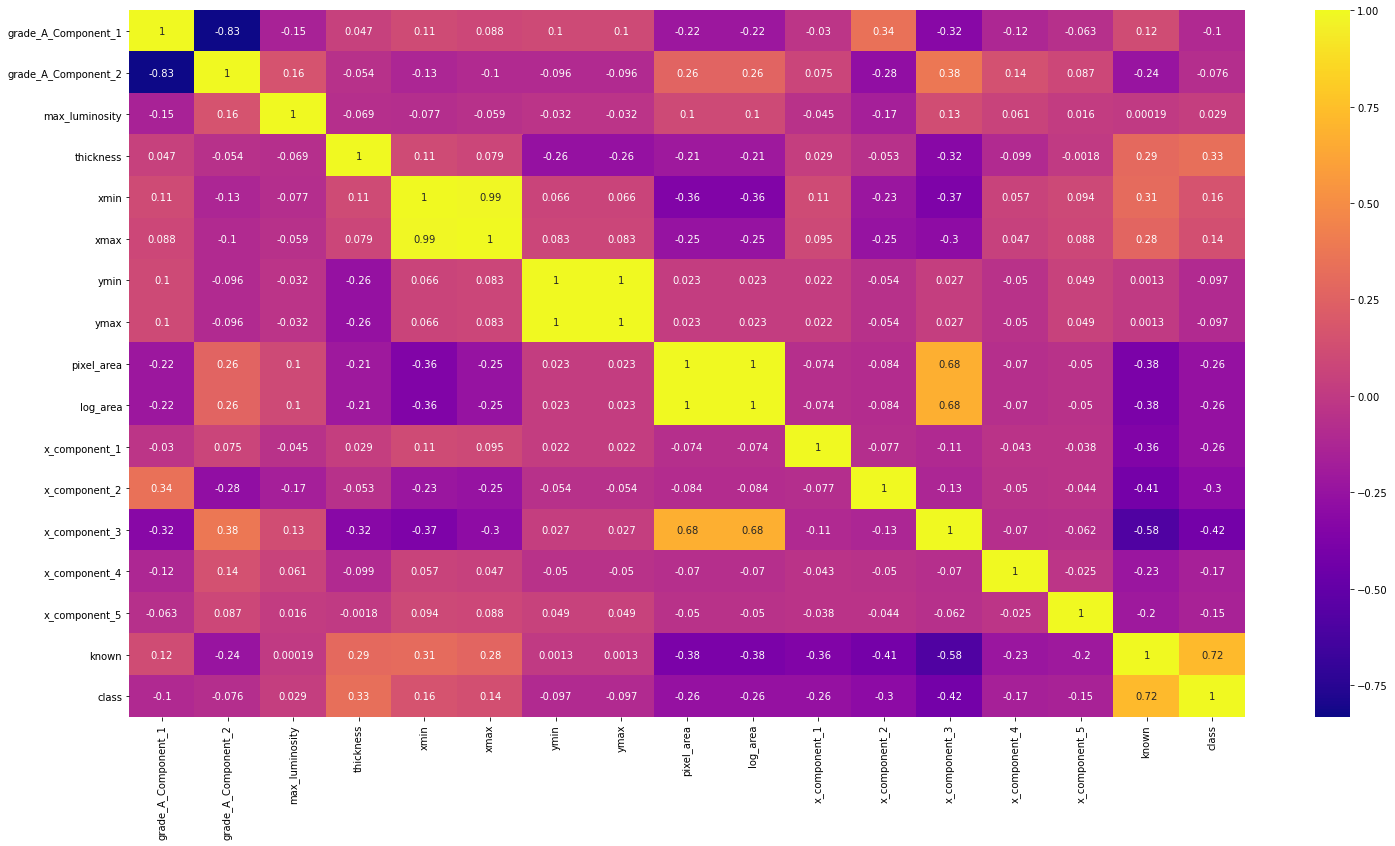

In [81]:
cor = train.corr()
plt.figure(figsize=(25,13))
sns.heatmap(cor,annot=True,cmap='plasma',linecolor='black')
plt.show()

In [82]:
train.head(2)

,grade_A_Component_1,grade_A_Component_2,max_luminosity,thickness,xmin,xmax,ymin,ymax,pixel_area,log_area,x_component_1,x_component_2,x_component_3,x_component_4,x_component_5,known,class
0,0,1,150,36,144,172,947225,947332,439,439.099273,0,0,1,0,0,1,1
1,1,0,134,55,1144,1152,2379058,2379624,329,329.205616,1,0,0,0,0,1,1


# Making new features

In [83]:
# #Log transfromations
# train['max_luminosity'] = np.log1p(train['max_luminosity'])
# train['log_thickness'] = np.log1p(train['thickness'])
# train['ymin'] = np.log1p(train['ymin'])
# train['ymax'] = np.log1p(train['ymax'])
# train['log_area'] = np.log1p(train['log_area'])

# #Log transfromations for Test

# test['max_luminosity'] = np.log1p(test['max_luminosity'])
# test['log_thickness'] = np.log1p(test['thickness'])
# test['ymin'] = np.log1p(train['ymin'])
# test['ymax'] = np.log1p(train['ymax'])
# test['log_area'] = np.log1p(train['log_area'])

In [84]:
#Log transfromations
train['log_max_luminosity'] = np.log1p(train['max_luminosity'])
train['log_thickness'] = np.log1p(train['thickness'])
train['log_ymin'] = np.log1p(train['ymin'])
train['log_ymax'] = np.log1p(train['ymax'])
train['log_log_area'] = np.log1p(train['log_area'])

#Log transfromations for Test

test['log_max_luminosity'] = np.log1p(test['max_luminosity'])
test['log_thickness'] = np.log1p(test['thickness'])
test['log_ymin'] = np.log1p(train['ymin'])
test['log_ymax'] = np.log1p(train['ymax'])
test['log_log_area'] = np.log1p(train['log_area'])

In [85]:
train['ratio_of_xmin_ymin'] = train['xmin'] / train['log_ymin']
train['ratio_of_xmin_ymin'] = np.log1p(train['ratio_of_xmin_ymin'])
train['ratio_of_xmax_ymax'] = train['xmax'] / train['log_ymax']
train['ratio_of_xmax_ymax'] = np.log1p(train['ratio_of_xmax_ymax'])

In [86]:
test['ratio_of_xmin_ymin'] = test['xmin'] / test['log_ymin']
test['ratio_of_xmin_ymin'] = np.log1p(test['ratio_of_xmin_ymin'])
test['ratio_of_xmax_ymax'] = test['xmax'] / train['log_ymax']
test['ratio_of_xmax_ymax'] = np.log1p(test['ratio_of_xmax_ymax'])

In [87]:
# # #Check for the distribution of loan amount
# test['ratio_of_xmin_ymin'].plot(kind='hist',figsize=(10,6),bins=100,edgecolor='k',
#                               title='ratio_of_xmax_ymax Distribution').autoscale(axis='x',tight=True)

#### now checking skewness and kurt

In [88]:
train.skew()

grade_A_Component_1    0.572731
grade_A_Component_2   -0.199574
max_luminosity         1.382582
thickness              1.887763
xmin                   0.464989
xmax                   0.475722
ymin                   2.812750
ymax                   2.812850
pixel_area             3.740554
log_area               3.740579
x_component_1          3.615360
x_component_2          3.069808
x_component_3          1.950331
x_component_4          5.834698
x_component_5          6.616655
known                 -0.660649
class                  0.000000
log_max_luminosity     0.207040
log_thickness          0.792849
log_ymin              -0.811209
log_ymax              -0.806477
log_log_area           1.102115
ratio_of_xmin_ymin    -0.637115
ratio_of_xmax_ymax    -0.731222
dtype: float64

In [89]:
train.kurt()

grade_A_Component_1    -1.673868
grade_A_Component_2    -1.962384
max_luminosity          6.535467
thickness               3.290117
xmin                   -1.075916
xmax                   -1.036290
ymin                   11.435847
ymax                   11.436507
pixel_area             17.877190
log_area               17.877608
x_component_1          11.083323
x_component_2           7.432099
x_component_3           1.805824
x_component_4          32.079869
x_component_5          41.827277
known                  -1.565309
class                  -2.002259
log_max_luminosity      3.220992
log_thickness          -0.120193
log_ymin                0.483858
log_ymax                0.464798
log_log_area            0.642310
ratio_of_xmin_ymin     -0.845430
ratio_of_xmax_ymax     -0.212979
dtype: float64

#### BackuP copy

In [90]:
temp_test = test.copy()
temp_train = train.copy()

In [91]:
# test = temp_test
# train = temp_train

In [92]:
train['class'].value_counts()

2    887
1    887
Name: class, dtype: int64

# ------------------------------------------------Train/Test Split--------------------------------------------

In [93]:
def metric(y,y0):
    return log_loss(y,y0)

In [94]:
features = list(set(train.columns)-set(['class']))
target = 'class'
len(features)

23

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.ensemble import ExtraTreesClassifier

In [96]:
from sklearn.model_selection import train_test_split,cross_val_predict
from sklearn.metrics import log_loss

In [97]:
def cross_valid(model,train,features,target,cv=3):
    results = cross_val_predict(model, train[features], train[target], method="predict_proba",cv=cv)
    return metric(train[target],results)

In [98]:
models = [lgb.LGBMClassifier(), xgb.XGBClassifier(), GradientBoostingClassifier(), 
#           LogisticRegression(max_iter=110), 
              RandomForestClassifier(),ExtraTreesClassifier(), 
#           CatBoostClassifier(),
             ]

for i in models:
    model = i
    error = cross_valid(model,train,features,target,cv=10)
    print(str(model).split("(")[0], error)

LGBMClassifier 0.278398351293496
XGBClassifier 0.27888515209420556
GradientBoostingClassifier 0.26378987185199304
RandomForestClassifier 0.24677690775640393
ExtraTreesClassifier 0.24393282310238534


In [99]:
# error = cross_valid(CatBoostClassifier(),train,features,target,cv=10)
# print(error)

#### Selective Scaling 

In [105]:
# cat_features = ['grade_A_Component_1','grade_A_Component_2', 'x_component_1', 'x_component_2',
#                 'x_component_3', 'x_component_4', 'x_component_5','known']
# num_features = ['max_luminosity', 'thickness', 'xmin', 'xmax', 'ymin', 'ymax', 'pixel_area', 'log_area']

In [106]:
# # train_c = train.copy()
# from sklearn.preprocessing import StandardScaler
# std = StandardScaler()
# train_scaled_num = std.fit_transform(train[num_features])
# test_scaled_num = std.transform(test[num_features])


# train[num_features] = pd.DataFrame(train_scaled_num, columns=num_features)
# test[num_features] = pd.DataFrame(test_scaled_num, columns=num_features)

# X and y, split

In [107]:
X = train.drop(['class'],axis=1)
y = train['class']

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13)

In [109]:
y_test.value_counts()

1    90
2    88
Name: class, dtype: int64

# Feature Scaling

In [110]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Transforming Test Dataset

In [111]:
scaled_test = scaler.transform(test)    # to be run only once

# PCA

In [112]:
from sklearn.decomposition import PCA
temp_pca = PCA(n_components=None)
X_temp =temp_pca.fit_transform(X_train)
variance = temp_pca.explained_variance_ratio_
print(variance)

[2.42829439e-01 1.73175074e-01 1.30871175e-01 8.43235176e-02
 7.33869617e-02 6.19162406e-02 5.57169498e-02 4.49679735e-02
 4.11266688e-02 3.06535131e-02 1.97481450e-02 1.67950141e-02
 9.06512396e-03 7.26924450e-03 5.69874281e-03 1.16562428e-03
 6.48775284e-04 5.25198188e-04 1.16002103e-04 6.13500172e-07
 3.55688788e-09 2.15272783e-10 4.71071542e-33]


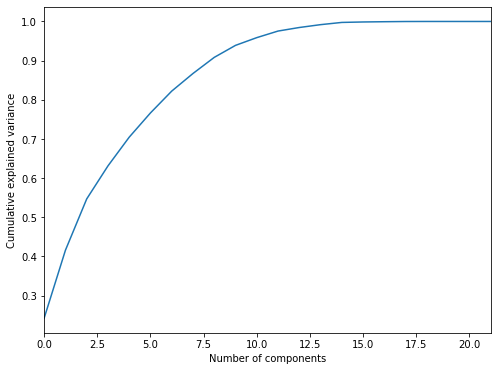

In [113]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(temp_pca.explained_variance_ratio_))
plt.xlim(0,21,1)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()
# ploting cum

In [114]:
# pca = PCA(n_components=13)
# X_train =pca.fit_transform(X_train)
# X_test = pca.transform(X_test)
# test = pca.transform(test)

# Modelling

In [115]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import log_loss

### XGBClassifier

#### HyperOpt XGBClassifier

In [116]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score

In [117]:
# def model(params):
#     clf = XGBClassifier(**params)
#     return cross_val_score(clf, X, y).mean()


# space = {
#     'learning_rate':    hp.choice('learning_rate',    np.arange(0.05, 0.2, 0.05)),
#     'max_depth':        hp.choice('max_depth',        np.arange(5, 20, 1, dtype=int)),
# #     'num_leaves': hp.choice('num_leaves', np.arange(16, 40, 2, dtype=int)),
# #     'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.3, 0.8, 0.1)),
#     'n_estimators':     hp.choice('n_estimators', np.arange(100,1000,10, dtype=int)),
#     'random_state': 51,
#     'boosting_type': 'gbdt'
# }


# def objective(params):
#     acc = model(params)
#     return {'loss': -acc, 'status': STATUS_OK}

# trials = Trials()
# best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials)

# print(best)

In [118]:
# from xgboost import XGBClassifier

# clf= XGBClassifier(
#                    learning_rate=0.06, 
#                    n_estimators=400,
#                    max_depth=14,
# #                     objective= 'binary:logistic',
#                   )

# clf.fit(X_train, y_train)

# y_pred = clf.predict_proba(X_test)
# print('XGboost log_loss {}'. format(log_loss(y_test, y_pred)))
# clf.score(X_train, y_train)

#### ExtraTreesClassifier

In [119]:
# n_estimators=100,   ##
#     criterion='gini',  ## entropy
#     max_depth=None,
#     min_samples_split=2, ##The minimum number of samples required to split an internal node:
#     min_samples_leaf=1,  ##The minimum number of samples required to be at a leaf node.
#     min_weight_fraction_leaf=0.0,  #float
#     max_features='auto',  #sqrt , log2
#     max_leaf_nodes=None,  # If None then unlimited number of leaf nodes.
#     min_impurity_decrease=0.0,
#     min_impurity_split=None,
#     bootstrap=False,
#     oob_score=False,
#     n_jobs=None,
#     random_state=21,
#     verbose=0,
#     warm_start=False,  #bool
#     class_weight=None,
#     ccp_alpha=0.0,
#     max_samples=None,

In [ ]:
def model(params):
    clf = ExtraTreesClassifier(**params)
    return cross_val_score(clf, X, y).mean()


space = {
    'n_estimators': hp.choice('n_estimators', np.arange(100, 300, 10, dtype=int)),
#     'max_depth':    hp.choice('max_depth', np.arange(5, 25, 1, dtype=int)),
    'min_samples_split' : hp.choice('min_samples_split', np.arange(2, 10, 1, dtype=int)),
    'min_samples_leaf' : hp.choice('min_samples_leaf', np.arange(1, 10, 1, dtype=int)),
    'max_features':'auto', #sqrt,log2
    'random_state':21,
    'warm_start':False,
}


def objective(params):
    acc = model(params)
    return {'loss': -acc, 'status': STATUS_OK}

trials = Trials()
best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials)

print(best)

In [120]:


clf= ExtraTreesClassifier(
                    n_estimators=105,
#                     max_depth= 19,
                    min_samples_split= 2,
#                     min_samples_leaf= 1,
                    max_features=  'sqrt',
                    random_state= 21   ,
                    warm_start=  False
                    )

clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)
print('ExtraTreesClassifier log_loss {}'. format(log_loss(y_test, y_pred)))
clf.score(X_train, y_train)

ExtraTreesClassifier log_loss 0.18401960273118773


1.0

In [121]:
# ExtC = ExtraTreesClassifier()
# from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
# kfold = StratifiedKFold(n_splits=10)

# ## Search grid for optimal parameters
# ex_param_grid = {"max_depth": [None],
# "min_samples_split": [2, 3, 10],
# "min_samples_leaf": [1, 3, 10],
# "bootstrap": [False],
# "n_estimators" :[100,300],
# "criterion": ["gini"]}


# gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= -1, verbose = 1)

# gsExtC.fit(X_train,y_train)

# ExtC_best = gsExtC.best_estimator_

# # Best score
# gsExtC.best_score_

In [122]:
# ExtC_best

In [123]:
# y_pred = gsExtC.predict_proba(X_test)

In [124]:
# print('ExtraTreesClassifier log_loss {}'. format(log_loss(y_test, y_pred)))
# clf.score(X_train, y_train)

#### HyperOpt for CatBoost

In [ ]:
# def model(params):
#     clf = CatBoostClassifier(**params)
#     return cross_val_score(clf, X, y).mean()


# space = {
#     'learning_rate':    hp.choice('learning_rate',    np.arange(0.05, 0.2, 0.05)),
#     'max_depth':        hp.choice('max_depth',        np.arange(5, 20, 1, dtype=int)),
# #     'num_leaves': hp.choice('num_leaves', np.arange(16, 40, 2, dtype=int)),
# # #     'colsample_bytree': hp.choice('colsample_bytree', np.arange(0.3, 0.8, 0.1)),
# # #     'num_leaves':        hp.choice('num_leaves', 200, 400,5, dtype=int),
#     'n_estimators':     hp.choice('n_estimators', np.arange(200,100,10, dtype=int)),
# #     'random_state': 51,
# #     'boosting_type': 'gbdt'
# }


# def objective(params):
#     acc = model(params)
#     return {'loss': -acc, 'status': STATUS_OK}

# trials = Trials()
# best = fmin(objective, space, algo=tpe.suggest, max_evals=100, trials=trials)


# print(best)

In [ ]:
# from catboost import CatBoostClassifier

# clf= CatBoostClassifier(
#                          depth=6,
#                          random_seed=42, 
#                          iterations=1000, 
#                          learning_rate=0.07,
#                          leaf_estimation_iterations=1,
#                          l2_leaf_reg=1, 
#                          bootstrap_type='Bayesian', 
#                          bagging_temperature=1, 
#                          random_strength=1,
#                          od_type='Iter', 
#                          od_wait=200,
#                         )

# clf.fit(X_train, y_train)

# y_pred = clf.predict_proba(X_test)

In [ ]:
# print('CatBoostClassifier log_loss {}'. format(log_loss(y_test, y_pred)))
# clf.score(X_train, y_train)

#### Cross_val_score Accuracy

In [125]:
from sklearn.model_selection import cross_val_score
acc = cross_val_score(estimator=clf,X=X,y=y,cv=10)

In [126]:
print(acc)
print(acc.mean())
print(acc.std())

[0.88202247 0.86516854 0.91011236 0.85955056 0.88700565 0.92090395
 0.89830508 0.92090395 0.92090395 0.90960452]
0.8974481051228338
0.021873765146931998


In [127]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred, labels=[1, 2]))

              precision    recall  f1-score   support

           1       0.93      0.90      0.92        90
           2       0.90      0.93      0.92        88

    accuracy                           0.92       178
   macro avg       0.92      0.92      0.92       178
weighted avg       0.92      0.92      0.92       178



In [128]:
#               precision    recall  f1-score   support

#            1       0.93      0.88      0.90        90
#            2       0.88      0.93      0.91        88

#     accuracy                           0.90       178
#    macro avg       0.91      0.90      0.90       178
# weighted avg       0.91      0.90      0.90       178

# Submission

#### Training on whole dataset

#### Predecting

In [129]:
y_pred = clf.predict_proba(scaled_test)

In [130]:
y_pred[2]  # belongs to class 1

array([1., 0.])

In [131]:
print(y_pred[2][0])
print(y_pred[2][1])

1.0
0.0


In [132]:
count =0
for i in range(583):
    if y_pred[i][1]>0.5:   # counting class 2 predictions
        count +=1
        
print("Class 2 ",count)
print("Class 1 ",583-count)

Class 2  245
Class 1  338


In [133]:
len(known_index_test)
# known_index_test

257

In [134]:
for i in range(583):
    if i in known_index_test:
        y_pred[i][0]=1
        y_pred[i][1]=0

In [135]:
count = 0
for i in range(583):
    if y_pred[i][1] > 0.95:
        count += 1

print(count)

10


In [136]:
# for i in range(583):
#     if y_pred[i][0] >0.95:
#         y_pred[i][0]=1
#         y_pred[i][1]=0
#     elif y_pred[i][1] >0.95:
#         y_pred[i][0]=0
#         y_pred[i][1]=1

In [138]:
result_data_df = pd.DataFrame(y_pred,columns=['1','2'])
result_data_df.to_excel('submission.xlsx',index=False)

In [139]:
result_data_df.head(10)

,1,2
0,1.000000,0.000000
1,0.257143,0.742857
2,1.000000,0.000000
3,1.000000,0.000000
4,0.561905,0.438095
5,1.000000,0.000000
6,1.000000,0.000000
7,1.000000,0.000000
8,1.000000,0.000000
9,0.190476,0.809524
